# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [2]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    np.random.seed(42)  # For reproducibility
    W1 = np.random.randn(input_size, hidden_size) * 0.1  # Weights for hidden layer
    b1 = np.zeros((1, hidden_size))  # Biases for hidden layer
    W2 = np.random.randn(hidden_size, output_size) * 0.1  # Weights for output layer
    b2 = np.zeros((1, output_size))  # Biases for output layer

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return parameters



TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [3]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    return sigmoid(x) * (1 - sigmoid(x))

TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [4]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Layer 1 (Hidden Layer)
    Z1 = np.dot(X, W1) + b1  # Linear combination
    A1 = relu(Z1)  # Activation function

    # Layer 2 (Output Layer)
    Z2 = np.dot(A1, W2) + b2  # Linear combination
    A2 = sigmoid(Z2)  # Activation function

    # Cache values for backpropagation
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }

    return A2, cache

TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [5]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    m = y_true.shape[0]  # Number of examples
    loss = -np.sum(y_true * np.log(y_pred + 1e-15)) / m  # Adding a small constant for numerical stability
    return loss

TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [6]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # Retrieve cache values
    A1 = cache["A1"]
    A2 = cache["A2"]

    m = y_true.shape[0]  # Number of examples

    # Compute gradients
    dZ2 = A2 - y_true  # Gradient for output layer
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dZ1 = np.dot(dZ2, W2.T) * relu_derivative(A1)  # Gradient for hidden layer
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return gradients

TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [7]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    parameters["W1"] -= learning_rate * gradients["dW1"]
    parameters["b1"] -= learning_rate * gradients["db1"]
    parameters["W2"] -= learning_rate * gradients["dW2"]
    parameters["b2"] -= learning_rate * gradients["db2"]

    return parameters

TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [8]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    parameters = initialize_parameters(input_size=28*28, hidden_size=hidden_size, output_size=10)

    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train.reshape(X_train.shape[0], -1), parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)

        # Backward propagation
        gradients = backward_propagation(X_train.reshape(X_train.shape[0], -1), y_train, parameters, cache)

        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        # Print loss every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Experimenting with different hidden layer sizes
hidden_layer_sizes = [32, 64, 128]  # Different sizes for the hidden layer

for size in hidden_layer_sizes:
    print(f"\nTraining with hidden layer size: {size}")
    train_model(x_train, y_train, hidden_size=size, epochs=50, learning_rate=0.01)


Training with hidden layer size: 32
Epoch 0, Loss: 0.7433
Epoch 10, Loss: 1.4150
Epoch 20, Loss: 1.8728
Epoch 30, Loss: 2.0125
Epoch 40, Loss: 2.0278

Training with hidden layer size: 64
Epoch 0, Loss: 0.8811
Epoch 10, Loss: 1.6329
Epoch 20, Loss: 1.9442
Epoch 30, Loss: 1.9923
Epoch 40, Loss: 1.9533

Training with hidden layer size: 128
Epoch 0, Loss: 0.9073
Epoch 10, Loss: 1.7959
Epoch 20, Loss: 1.8213
Epoch 30, Loss: 1.7240
Epoch 40, Loss: 1.6178


TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [9]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}
    for key in parameters.keys():
        v[key] = np.zeros_like(parameters[key])  # Initialize first moment
        s[key] = np.zeros_like(parameters[key])  # Initialize second moment

    t = 0  # Initialize time step
    return v, s, t

def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1  # Increment time step

    for key in parameters.keys():
        # Update biased first moment estimate
        v[key] = beta1 * v[key] + (1 - beta1) * gradients["d" + key]
        # Update biased second moment estimate
        s[key] = beta2 * s[key] + (1 - beta2) * (gradients["d" + key] ** 2)

        # Bias correction
        v_corrected = v[key] / (1 - beta1 ** t)
        s_corrected = s[key] / (1 - beta2 ** t)

        # Update parameters
        parameters[key] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)

    return parameters, v, s, t

TODO: Implement Adam optimizer into the training loop.

In [10]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    parameters = initialize_parameters(input_size=28*28, hidden_size=hidden_size, output_size=10)
    v, s, t = initialize_adam(parameters)  # Initialize Adam variables

    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train.reshape(X_train.shape[0], -1), parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)

        # Backward propagation
        gradients = backward_propagation(X_train.reshape(X_train.shape[0], -1), y_train, parameters, cache)

        # Update parameters using Adam
        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)

        # Print loss every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Now you can call this function for training
hidden_layer_sizes = [32, 64, 128]  # Different sizes for the hidden layer

for size in hidden_layer_sizes:
    print(f"\nTraining with hidden layer size: {size}")
    train_model_with_adam(x_train, y_train, hidden_size=size, epochs=50, learning_rate=0.001)


Training with hidden layer size: 32
Epoch 0, Loss: 0.7433
Epoch 10, Loss: 1.3292
Epoch 20, Loss: 2.1720
Epoch 30, Loss: 2.0370
Epoch 40, Loss: 1.5097

Training with hidden layer size: 64
Epoch 0, Loss: 0.8811
Epoch 10, Loss: 1.8987
Epoch 20, Loss: 2.0360
Epoch 30, Loss: 1.3678
Epoch 40, Loss: 1.0751

Training with hidden layer size: 128
Epoch 0, Loss: 0.9073
Epoch 10, Loss: 2.0510
Epoch 20, Loss: 1.0746
Epoch 30, Loss: 0.9007
Epoch 40, Loss: 0.8283


### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [11]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}
    for key in parameters.keys():
        s[key] = np.zeros_like(parameters[key])  # Initialize second moment
    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters.keys():
        # Update the second moment estimate
        s[key] = beta * s[key] + (1 - beta) * (gradients["d" + key] ** 2)

        # Update parameters
        parameters[key] -= learning_rate * gradients["d" + key] / (np.sqrt(s[key]) + epsilon)

    return parameters, s

TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [12]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters = initialize_parameters(input_size=28*28, hidden_size=hidden_size, output_size=10)

    # Initialize optimizer variables
    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)

    loss_history = []

    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train.reshape(X_train.shape[0], -1), parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Backward propagation
        gradients = backward_propagation(X_train.reshape(X_train.shape[0], -1), y_train, parameters, cache)

        # Update parameters using the specified optimizer
        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)

        # Print loss every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss ({optimizer}): {loss:.4f}")

    return loss_history

TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

Training with Adam optimizer...
Epoch 0, Loss (adam): 0.8811
Epoch 10, Loss (adam): 1.8987
Epoch 20, Loss (adam): 2.0360
Epoch 30, Loss (adam): 1.3678
Epoch 40, Loss (adam): 1.0751

Training with RMSprop optimizer...
Epoch 0, Loss (rmsprop): 0.8811
Epoch 10, Loss (rmsprop): 1.5220
Epoch 20, Loss (rmsprop): 1.1773
Epoch 30, Loss (rmsprop): 1.0048
Epoch 40, Loss (rmsprop): 0.9528


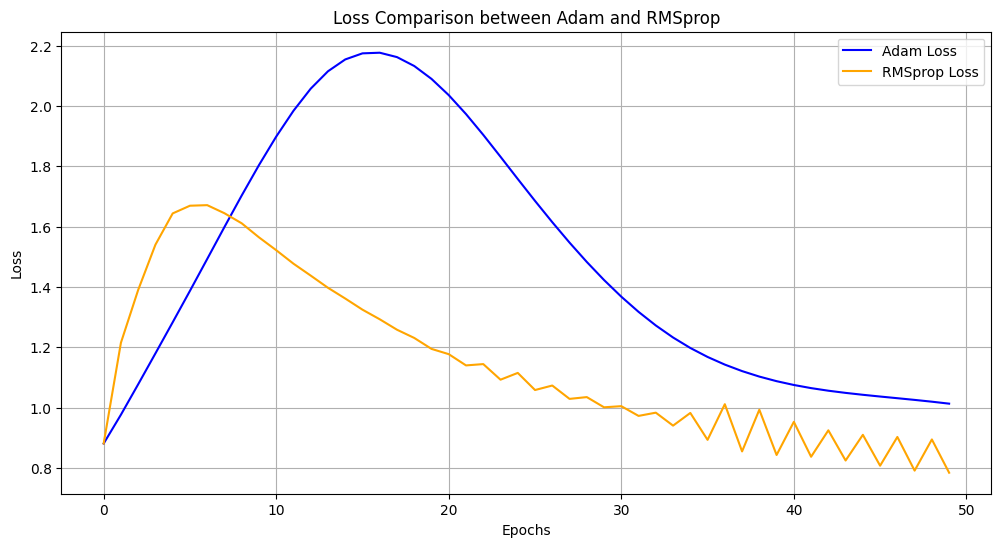

In [13]:
import matplotlib.pyplot as plt

def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print("Training with Adam optimizer...")
    adam_loss_history = train_model(X_train, y_train, hidden_size, epochs, learning_rate=0.001, optimizer='adam')

    print("\nTraining with RMSprop optimizer...")
    rmsprop_loss_history = train_model(X_train, y_train, hidden_size, epochs, learning_rate=0.001, optimizer='rmsprop')

    # Plotting the loss histories
    plt.figure(figsize=(12, 6))
    plt.plot(adam_loss_history, label='Adam Loss', color='blue')
    plt.plot(rmsprop_loss_history, label='RMSprop Loss', color='orange')
    plt.title('Loss Comparison between Adam and RMSprop')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Call the comparison function
compare_optimizers(x_train, y_train, hidden_size=64, epochs=50)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [14]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters.keys():
        parameters[key] -= learning_rate * gradients["d" + key]

    return parameters

2. Modify the Training Loop


In [15]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters = initialize_parameters(input_size=28*28, hidden_size=hidden_size, output_size=10)
    loss_history = []

    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train.reshape(X_train.shape[0], -1), parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Backward propagation
        gradients = backward_propagation(X_train.reshape(X_train.shape[0], -1), y_train, parameters, cache)

        # Update parameters using SGD
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        # Print loss every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss (learning rate {learning_rate}): {loss:.4f}")

    return loss_history

3. Experiment with Different Learning Rates



Training with learning rate: 0.001
Epoch 0, Loss (learning rate 0.001): 0.8811
Epoch 10, Loss (learning rate 0.001): 0.9692
Epoch 20, Loss (learning rate 0.001): 1.0532
Epoch 30, Loss (learning rate 0.001): 1.1344
Epoch 40, Loss (learning rate 0.001): 1.2132

Training with learning rate: 0.01
Epoch 0, Loss (learning rate 0.01): 0.8811
Epoch 10, Loss (learning rate 0.01): 1.6329
Epoch 20, Loss (learning rate 0.01): 1.9442
Epoch 30, Loss (learning rate 0.01): 1.9923
Epoch 40, Loss (learning rate 0.01): 1.9533

Training with learning rate: 0.1
Epoch 0, Loss (learning rate 0.1): 0.8811
Epoch 10, Loss (learning rate 0.1): 1.5970
Epoch 20, Loss (learning rate 0.1): 1.2359
Epoch 30, Loss (learning rate 0.1): 1.0736
Epoch 40, Loss (learning rate 0.1): 0.9790


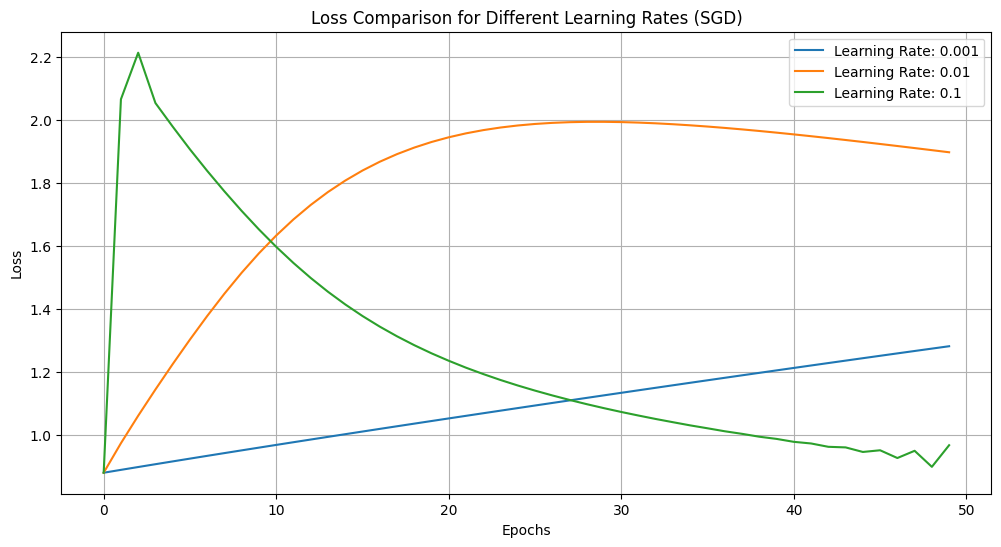

In [16]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    loss_histories = {}

    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")
        loss_history = train_model_with_sgd(X_train, y_train, hidden_size, epochs, learning_rate=lr)
        loss_histories[lr] = loss_history

    # Plotting the loss histories
    plt.figure(figsize=(12, 6))
    for lr, losses in loss_histories.items():
        plt.plot(losses, label=f'Learning Rate: {lr}')
    plt.title('Loss Comparison for Different Learning Rates (SGD)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Call the comparison function
compare_learning_rates(x_train, y_train, hidden_size=64, epochs=50, learning_rates=[0.001, 0.01, 0.1])

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [17]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}
    for key in parameters.keys():
        v[key] = np.zeros_like(parameters[key])  # Initialize momentum
    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for key in parameters.keys():
        v[key] = beta * v[key] + (1 - beta) * gradients["d" + key]  # Update momentum
        parameters[key] -= learning_rate * v[key]  # Update parameters

    return parameters, v

3. Modify the Training Loop


In [18]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters = initialize_parameters(input_size=28*28, hidden_size=hidden_size, output_size=10)

    # Initialize momentum variables if using momentum
    if optimizer == 'momentum':
        v = initialize_momentum(parameters)

    loss_history = []

    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train.reshape(X_train.shape[0], -1), parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Backward propagation
        gradients = backward_propagation(X_train.reshape(X_train.shape[0], -1), y_train, parameters, cache)

        # Update parameters using the specified optimizer
        if optimizer == 'sgd':
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        elif optimizer == 'momentum':
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)

        # Print loss every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss ({optimizer}): {loss:.4f}")

    return loss_history

4. Train the Model with Both Optimizers


Training with Classic SGD...
Epoch 0, Loss (sgd): 0.8811
Epoch 10, Loss (sgd): 1.6329
Epoch 20, Loss (sgd): 1.9442
Epoch 30, Loss (sgd): 1.9923
Epoch 40, Loss (sgd): 1.9533

Training with SGD with Momentum...
Epoch 0, Loss (momentum): 0.8811
Epoch 10, Loss (momentum): 1.2657
Epoch 20, Loss (momentum): 1.9784
Epoch 30, Loss (momentum): 2.4056
Epoch 40, Loss (momentum): 2.3408


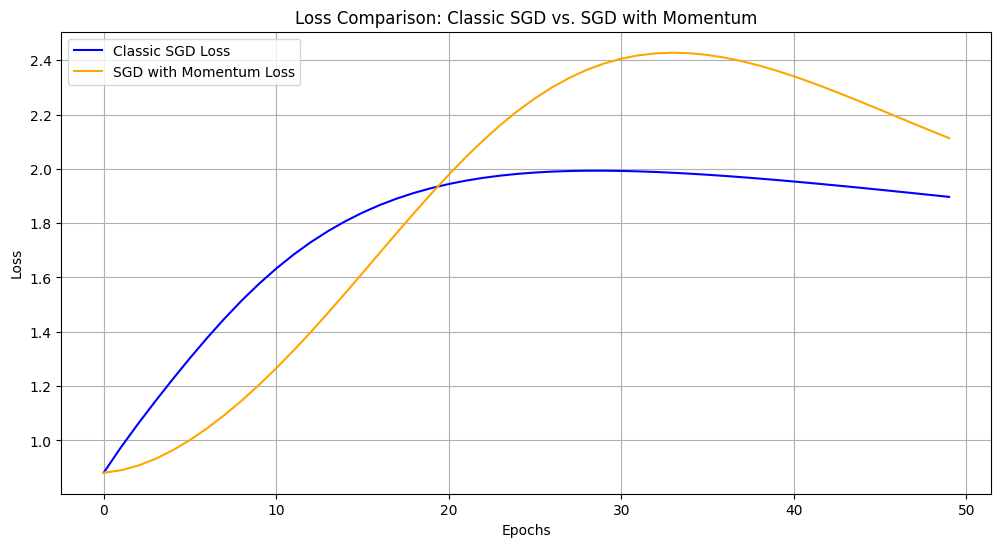

In [19]:
import matplotlib.pyplot as plt

def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print("Training with Classic SGD...")
    sgd_loss_history = train_model(X_train, y_train, hidden_size, epochs, learning_rate=0.01, optimizer='sgd')

    print("\nTraining with SGD with Momentum...")
    momentum_loss_history = train_model(X_train, y_train, hidden_size, epochs, learning_rate=0.01, optimizer='momentum')

    # Plotting the loss histories
    plt.figure(figsize=(12, 6))
    plt.plot(sgd_loss_history, label='Classic SGD Loss', color='blue')
    plt.plot(momentum_loss_history, label='SGD with Momentum Loss', color='orange')
    plt.title('Loss Comparison: Classic SGD vs. SGD with Momentum')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Call the comparison function
compare_sgd_and_momentum(x_train, y_train, hidden_size=64, epochs=50)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [20]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    parameters = initialize_parameters(input_size=28*28, hidden_size=hidden_size, output_size=10)
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        # Shuffle the training data at the beginning of each epoch
        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]

        # Mini-batch gradient descent
        for start in range(0, X_train.shape[0], batch_size):
            end = start + batch_size
            X_batch = X_train_shuffled[start:end]
            y_batch = y_train_shuffled[start:end]

            # Forward propagation
            A2, cache = forward_propagation(X_batch.reshape(X_batch.shape[0], -1), parameters)

            # Compute loss
            loss = compute_loss(y_batch, A2)
            loss_history.append(loss)

            # Backward propagation
            gradients = backward_propagation(X_batch.reshape(X_batch.shape[0], -1), y_batch, parameters, cache)

            # Update parameters using SGD
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        # Calculate accuracy for the epoch
        predictions = np.argmax(A2, axis=1)
        true_labels = np.argmax(y_batch, axis=1)
        accuracy = np.mean(predictions == true_labels)
        accuracy_history.append(accuracy)

        # Print loss and accuracy every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    return loss_history, accuracy_history

2. Train the Model with Different Mini-Batch Sizes


In [21]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    results = {}

    for batch_size in batch_sizes:
        print(f"\nTraining with mini-batch size: {batch_size}")
        loss_history, accuracy_history = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, learning_rate=0.01, batch_size=batch_size)
        results[batch_size] = (loss_history, accuracy_history)

        # Print final results
        final_loss = loss_history[-1]  # Get the last loss value
        final_accuracy = accuracy_history[-1]  # Get the last accuracy value
        print(f"Final Loss for batch size {batch_size}: {final_loss:.4f}")
        print(f"Final Accuracy for batch size {batch_size}: {final_accuracy:.4f}")

# Call the comparison function
compare_mini_batch_sizes(x_train, y_train, hidden_size=64, epochs=50, batch_sizes=[16, 32, 64])


Training with mini-batch size: 16
Epoch 0, Loss: 0.7233, Accuracy: 0.6875
Epoch 10, Loss: 0.4548, Accuracy: 0.8750
Epoch 20, Loss: 0.2091, Accuracy: 0.8750
Epoch 30, Loss: 0.2622, Accuracy: 0.9375
Epoch 40, Loss: 0.3242, Accuracy: 0.9375
Final Loss for batch size 16: 0.3031
Final Accuracy for batch size 16: 0.8750

Training with mini-batch size: 32
Epoch 0, Loss: 0.6352, Accuracy: 0.7188
Epoch 10, Loss: 0.6252, Accuracy: 0.7500
Epoch 20, Loss: 0.3829, Accuracy: 0.8750
Epoch 30, Loss: 0.3514, Accuracy: 0.9062
Epoch 40, Loss: 0.2668, Accuracy: 0.9062
Final Loss for batch size 32: 0.2293
Final Accuracy for batch size 32: 0.9375

Training with mini-batch size: 64
Epoch 0, Loss: 0.7203, Accuracy: 0.6250
Epoch 10, Loss: 0.6136, Accuracy: 0.7500
Epoch 20, Loss: 0.4563, Accuracy: 0.8750
Epoch 30, Loss: 0.3877, Accuracy: 0.8750
Epoch 40, Loss: 0.2832, Accuracy: 0.8750
Final Loss for batch size 64: 0.2443
Final Accuracy for batch size 64: 0.8750


### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [22]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    parameters = initialize_parameters(input_size=28*28, hidden_size=hidden_size, output_size=10)
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        # Forward propagation for the entire dataset
        A2, cache = forward_propagation(X_train.reshape(X_train.shape[0], -1), parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Backward propagation for the entire dataset
        gradients = backward_propagation(X_train.reshape(X_train.shape[0], -1), y_train, parameters, cache)

        # Update parameters using SGD
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        # Calculate accuracy for the epoch
        predictions = np.argmax(A2, axis=1)
        true_labels = np.argmax(y_train, axis=1)
        accuracy = np.mean(predictions == true_labels)
        accuracy_history.append(accuracy)

        # Print loss and accuracy every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss (Full-Batch): {loss:.4f}, Accuracy: {accuracy:.4f}")

    return loss_history, accuracy_history

In [23]:
def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    import time

    # Train using mini-batch gradient descent
    print("Training with Mini-Batch Gradient Descent...")
    start_time = time.time()
    mini_batch_loss_history, mini_batch_accuracy_history = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, learning_rate=0.01, batch_size=batch_size)
    mini_batch_time = time.time() - start_time

    # Train using full-batch gradient descent
    print("\nTraining with Full-Batch Gradient Descent...")
    start_time = time.time()
    full_batch_loss_history, full_batch_accuracy_history = train_model_full_batch(X_train, y_train, hidden_size, epochs, learning_rate=0.01)
    full_batch_time = time.time() - start_time

    # Print final results
    mini_batch_final_loss = mini_batch_loss_history[-1]
    mini_batch_final_accuracy = mini_batch_accuracy_history[-1]
    print(f"\nMini-Batch Final Loss: {mini_batch_final_loss:.4f}, Final Accuracy: {mini_batch_final_accuracy:.4f}, Time: {mini_batch_time:.2f} seconds")

    full_batch_final_loss = full_batch_loss_history[-1]
    full_batch_final_accuracy = full_batch_accuracy_history[-1]
    print(f"Full-Batch Final Loss: {full_batch_final_loss:.4f}, Final Accuracy: {full_batch_final_accuracy:.4f}, Time: {full_batch_time:.2f} seconds")

# Call the comparison function
compare_mini_batch_and_full_batch(x_train, y_train, hidden_size=64, epochs=50, batch_size=32)

Training with Mini-Batch Gradient Descent...
Epoch 0, Loss: 0.6352, Accuracy: 0.7188
Epoch 10, Loss: 0.6252, Accuracy: 0.7500
Epoch 20, Loss: 0.3829, Accuracy: 0.8750
Epoch 30, Loss: 0.3514, Accuracy: 0.9062
Epoch 40, Loss: 0.2668, Accuracy: 0.9062

Training with Full-Batch Gradient Descent...
Epoch 0, Loss (Full-Batch): 0.8811, Accuracy: 0.1000
Epoch 10, Loss (Full-Batch): 1.6329, Accuracy: 0.0996
Epoch 20, Loss (Full-Batch): 1.9442, Accuracy: 0.1384
Epoch 30, Loss (Full-Batch): 1.9923, Accuracy: 0.1852
Epoch 40, Loss (Full-Batch): 1.9533, Accuracy: 0.2387

Mini-Batch Final Loss: 0.2293, Final Accuracy: 0.9375, Time: 96.27 seconds
Full-Batch Final Loss: 1.8967, Final Accuracy: 0.2779, Time: 19.52 seconds
